In [ ]:
pip install requests-html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [ ]:
url = 'https://books.toscrape.com/'
response = requests.get(url)

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
soup.find()

<html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static/oscar/js/bootstrap-datetimepicker/bootstrap-datetimepicker.css" rel="stylesheet"/>
<link href="static/oscar/css/datetimepicker.css" rel="stylesheet" type="text/css"/>
</head>
<body class="default" id="default">
<header class="header container-fluid">
<div class="page_inner">
<div class

In [ ]:
genre_links = soup.find('ul', class_='nav nav-list').find_all('a')[1:]
genre_links

[<a href="catalogue/category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="catalogue/category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="catalogue/category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="catalogue/category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         </a>,
 <a href="catalogue/category/books/classics_6/index.html">
                             
                                 Classics
                             
                         </a>,
 <a href="cata

In [ ]:

genres = {}
genre_name = []

def get_genre_and_link(url, name):
    for link in genre_links:
        name_genre = link.text.strip()
        link_genre = url + link['href']
        genres[name_genre] = link_genre
        name.append(name_genre)

get_genre_and_link(url, genre_name)

In [ ]:
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

In [ ]:
all_books_data = []

In [ ]:
books = soup.find_all('article', class_='product_pod')

In [ ]:
books

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

In [ ]:
'''
for i in range(50):
  url = 'https://books.toscrape.com/catalogue/page-'+ str(i) +'.html'
  response = requests.get(url)
  soup = BeautifulSoup(response.content,'html.parser')
'''

"\nfor i in range(50):\n  url = 'https://books.toscrape.com/catalogue/page-'+ str(i) +'.html'\n  response = requests.get(url)\n  soup = BeautifulSoup(response.content,'html.parser')\n"

In [ ]:
#float(books[0].find('p', class_='price_color').text.strip().replace('£',''))
books[0].find('p', class_='price_color')

<p class="price_color">£51.77</p>

In [ ]:
#rating = rating_map[books[0].find('p',class_='star-rating')['class'][1]]

In [ ]:
books[0].find('p',class_='instock availability').text.strip()

'In stock'

In [ ]:
def get_book_details(genre,soup):
  books = soup.find_all('article', class_='product_pod')
  for book in books:
    title = book.h3.a['title']
    price = float(book.find('p', class_='price_color').text.strip().replace('£',''))
    rating = float(rating_map[book.find('p',class_='star-rating')['class'][1]])
    availability = book.find('p',class_='instock availability').text.strip()

    all_books_data.append([genre, title, price, rating, availability])

In [ ]:
for g in genre_name:
    genre_url = genres[g]
    response = requests.get(genre_url)
    soup = BeautifulSoup(response.content, 'html.parser')

    get_book_details(g, soup)

In [ ]:
df = pd.DataFrame(all_books_data, columns=['Genre', 'Title', 'Price', 'Rating', 'Availability'])
df.head()

,Genre,Title,Price,Rating,Availability
0,Travel,It's Only the Himalayas,45.17,2.0,In stock
1,Travel,Full Moon over Noah’s Ark: An Odyssey to Mount...,49.43,4.0,In stock
2,Travel,See America: A Celebration of Our National Par...,48.87,3.0,In stock
3,Travel,Vagabonding: An Uncommon Guide to the Art of L...,36.94,2.0,In stock
4,Travel,Under the Tuscan Sun,37.33,3.0,In stock


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         517 non-null    object 
 1   Title         517 non-null    object 
 2   Price         517 non-null    float64
 3   Rating        517 non-null    float64
 4   Availability  517 non-null    object 
dtypes: float64(2), object(3)
memory usage: 20.3+ KB


Analysis

Distribution of Price and Genre

In [ ]:
df.duplicated().value_counts()

,count
False,517


In [ ]:
import matplotlib.pyplot as plt



---



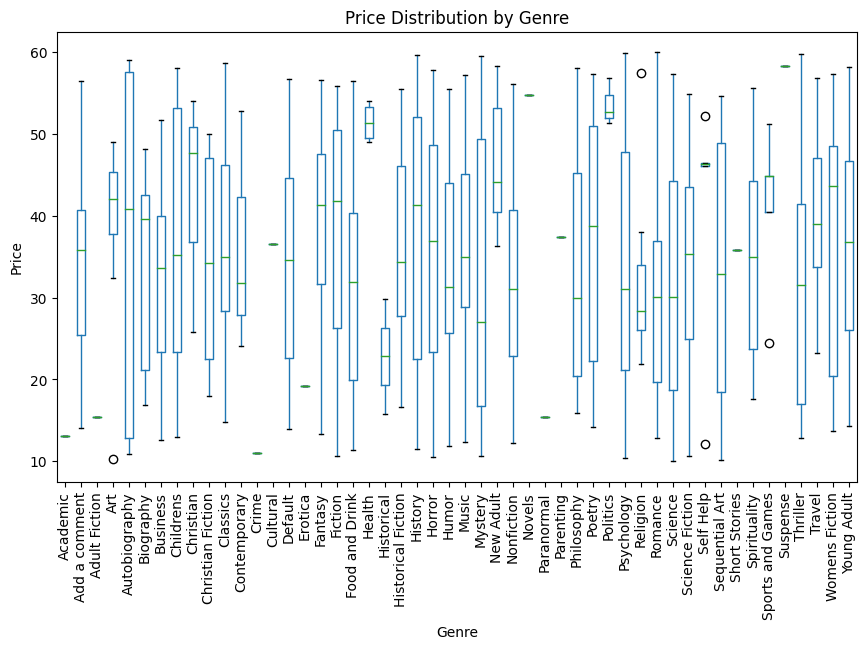

In [ ]:
df.boxplot(column='Price', by='Genre', grid=False, rot=90, figsize=(10, 6))
plt.title('Price Distribution by Genre')
plt.suptitle('')  # Remove default title to avoid overlap
plt.xlabel('Genre')
plt.ylabel('Price')
plt.show()

**Price Distribution by Genre:**

I analyzed the price distribution across different genres using a box plot. I noticed that genres such as Art and Science Fiction had higher-priced books, while genres like Children’s and Contemporary had lower-priced books.

This shows that genre plays a role in book pricing, with more specialized or visually focused genres (like Art) commanding higher prices, while more popular genres tend to have lower average prices.



---



In [ ]:
correlation = df['Price'].corr(df['Rating'])
print("Correlation between Price and Rating:", correlation)


Correlation between Price and Rating: 0.023690566362273985


**Correlation Between Price and Rating:**

To further investigate the relationship between price and rating, I calculated the correlation coefficient. The result showed a very low correlation (0.02), indicating that there is no significant relationship between a book's price and its rating. High-priced books don’t necessarily have higher ratings, and vice versa.



---



<Figure size 800x600 with 0 Axes>

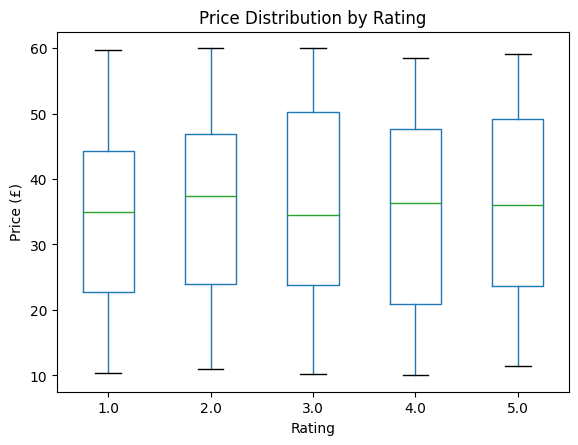

In [ ]:
# Create a box plot of Price by Rating
plt.figure(figsize=(8,6))
df.boxplot(column='Price', by='Rating', grid=False)

# Add labels and title
plt.title('Price Distribution by Rating')
plt.suptitle('')  # Remove default subtitle to avoid overlap
plt.xlabel('Rating')
plt.ylabel('Price (£)')

# Show plot
plt.show()

**Price Distribution by Rating:**

I also created a box plot to observe the relationship between price and rating. Interestingly, the price distribution was relatively consistent across different rating levels. Books priced between £30 to £40 were common, regardless of whether the rating was low or high.

This suggests that price is not strongly influenced by a book's rating, as the distribution was fairly even.



---



In [ ]:
most_common_rating = df['Rating'].mode()[0]
print("Most Common Rating:", most_common_rating)


Most Common Rating: 1.0


**Most Common Rating:**

By calculating the most common rating, I found that the most frequent rating was 1.0. This result indicates a skew towards low ratings for many books, implying that there may be a significant number of books that are not as well-received by readers.



---



In [ ]:
high_rated_books = df[df['Rating'] >= 4].groupby('Genre')['Title'].count()
#print(high_rated_books)

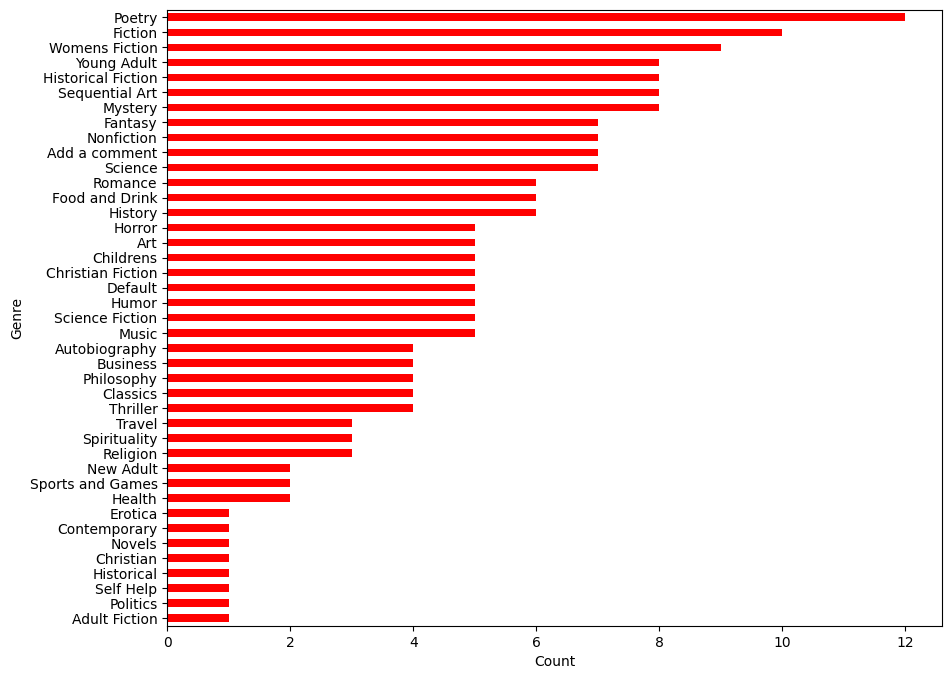

In [ ]:
plt.figure(figsize=(10,8))
high_rated_books.sort_values(ascending=True).plot(kind='barh',color='r')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**High Rated Books (Count of Books with 4+ Ratings):**

Next, I analyzed how many books in each genre have high ratings (4 or above). I saw that genres such as Poetry, Fiction, and Womens Fiction had a high count of top-rated books. In contrast, genres like Politics, Adult Fiction, and Self Help had fewer highly rated books.

This reveals that genres with a more artistic or literary focus tend to have more books that achieve higher ratings.



---



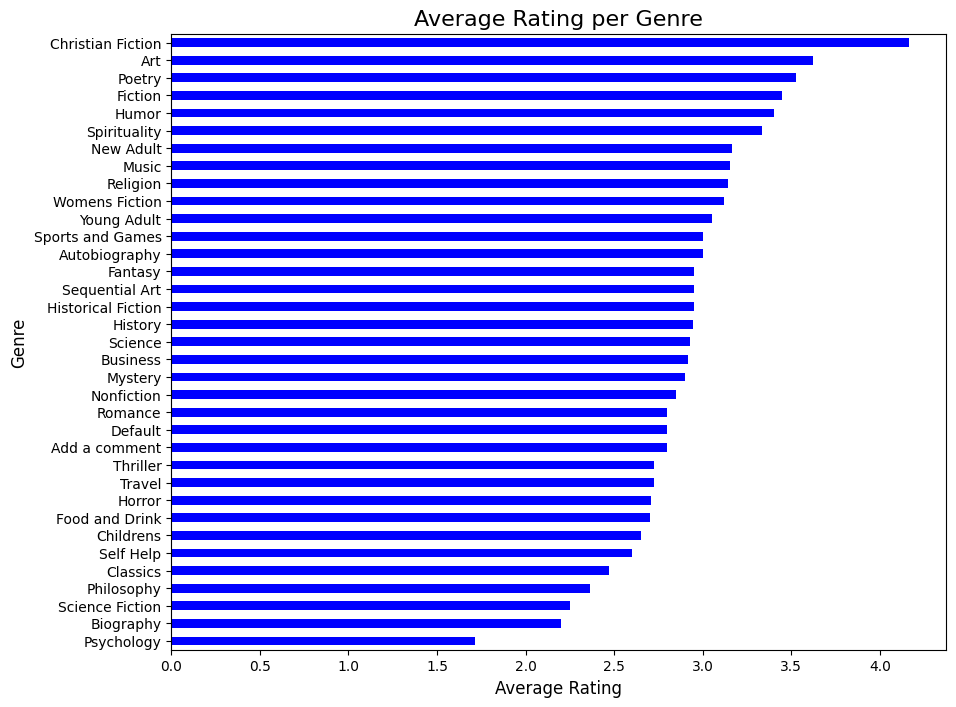

In [ ]:
# Calculate average rating per genre
filtered_df = df.groupby('Genre').filter(lambda x: len(x) >= 5)
avg_rating_per_genre = filtered_df.groupby('Genre')['Rating'].mean().sort_values(ascending=True)

# Plot a horizontal bar chart
plt.figure(figsize=(10,8))
avg_rating_per_genre.plot(kind='barh', color='b')

# Add labels and title
plt.title('Average Rating per Genre', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Show plot
plt.show()


**Average Rating per Genre:**

The first visualization focused on calculating the average rating per genre. From this, I observed that genres such as Christian Fiction, Art, and Poetry had the highest average ratings, while genres like Psychology and Biography were rated lower.

This suggests that certain niche genres, particularly those with fewer but highly rated books, tend to have higher average ratings compared to broader categories.


---



#Conclusion

In conclusion, the analysis reveals that while genres have a clear influence on book ratings and pricing, the relationship between price and rating is weak. Genres such as Christian Fiction, Art, and Poetry are highly rated, and pricing varies widely by genre but not by rating. Your analysis highlights that customer ratings don’t significantly impact book prices, which remain consistent across different rating levels. Instead, it is the genre that plays a larger role in determining the price of a book.